# Prototype: epsilon

| Properties      | Data    |
|---------------|-----------|
| *Labels* | `['BENIGN', 'DDoS']` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `10.000`|
| *Adversarial Attack* | `FGSM` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect misclassified Samples` |


---

## *Has to be run first alone!*

In [2]:
# To import modules from the functions directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

## Data Preprocessing

In [3]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
label_names = ['BENIGN', 'DDoS'] # labels to include
sample_size = 5000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset(label_names)

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=42)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
--- Extracting labels ---
 Label
BENIGN    2271320
DDoS       128025
Name: count, dtype: int64
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (10000, 79)
--- Splitti

## Split Data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9000, 70) (1000, 70) (9000, 2) (1000, 2)


## Create IDS

In [22]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# TODO: build ids with complete dataset
# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

Epoch 1/10


64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.5964 - val_accuracy: 0.9775 - val_loss: 0.2770
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.1938 - val_accuracy: 0.9812 - val_loss: 0.0661
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9803 - loss: 0.0637 - val_accuracy: 0.9837 - val_loss: 0.0508
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9827 - loss: 0.0506 - val_accuracy: 0.9856 - val_loss: 0.0433
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9834 - loss: 0.0445 - val_accuracy: 0.9856 - val_loss: 0.0378
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0412 - val_accuracy: 0.9862 - val_loss: 0.0341
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9843 - loss: 0.0384 - val_accuracy: 0.9881 - val_loss: 0.0323
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9847 - loss: 0.0367 - val_accuracy: 0.9887 - val_loss: 0.0306
Epo

2025-03-21 10:17:44.252096: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
Predictions on Normal Data | Indices: Index([383258, 1283627, 1595713, 323550, 474229], dtype='int64')... | Shape: (8000, 2)


## Generate Attacks

In [21]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# create smaller dataset
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# generate attacks on the training data
X_adv = ag.generate_fgsm_attacks(art_model, X_train, target_label=1)
print(f"Create Adversarial Attack | Indices: {X_adv.index[:5]}... | Shape: {X_adv.shape}")

y_pred_adv = ag.evaluate_art_model(art_model, X_adv, y_train)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv.index[:5]}... | Shape: {y_pred_adv.shape}")

(8000, 70) (2000, 70) (8000, 2) (2000, 2)
Adversarial FGSM examples generated. Shape: (8000, 70)
Create Adversarial Attack | Indices: Index([383258, 1283627, 1595713, 323550, 474229], dtype='int64')... | Shape: (8000, 70)
Accuracy: 49.85%
              precision    recall  f1-score   support

      BENIGN       0.00      0.00      0.00      4012
      ATTACK       0.50      1.00      0.67      3988

    accuracy                           0.50      8000
   macro avg       0.25      0.50      0.33      8000
weighted avg       0.25      0.50      0.33      8000

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 4012, FN: 0, TP: 3988
Predictions on Adversarial Attacks | Indices: Index([383258, 1283627, 1595713, 323550, 474229], dtype='int64')... | Shape: (8000, 2)


/home/felix/Documents/Uni/xai-assisted-intrusion-detection-system/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felix/Documents/Uni/xai-assisted-intrusion-detection-system/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felix/Documents/Uni/xai-assisted-intrusion-detection-system/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

In [7]:
# find correctly classified samples
benign_indices = y_train[y_train['BENIGN'] == 1].index
print(f"Correct Benign Samples: {len(benign_indices)}")
benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
print(f"    Predicted Benign Samples on Normal Data: {len(benign_adv_predicted_indices)}")
benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
print(f"    Predicted Benign Samples on Adversarial Data: {len(benign_predicted_adversarial_indices)}")
attack_indices = y_train[y_train['ATTACK'] == 1].index
print(f"Correct Attack Samples: {len(attack_indices)}")
attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
print(f"    Predicted Attack Samples on Normal Data: {len(attack_adv_predicted_indices)}")
attack_predicted_adversarial_indices = y_pred_adv[y_pred_adv['ATTACK'] == 1].index
print(f"    Predicted Attack Samples on Adversarial Data: {len(attack_predicted_adversarial_indices)}")
print("-----------------------------")
correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
print(f"Correctly classified as BENIGN from the IDS: {len(correctly_benign_classified_indices)} | Indices: {correctly_benign_classified_indices[:3]}")
misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
print(f"ATTACK sample misclassified as BENIGN due to adversarial attack: {len(misclassified_as_benign_due_attack_indices)} | Indices: {misclassified_as_benign_due_attack_indices[:3]}")

Correct Benign Samples: 3988
    Predicted Benign Samples on Normal Data: 4577
    Predicted Benign Samples on Adversarial Data: 8000
Correct Attack Samples: 4012
    Predicted Attack Samples on Normal Data: 4423
    Predicted Attack Samples on Adversarial Data: 0
-----------------------------
Correctly classified as BENIGN from the IDS: 3980 | Indices: Index([1283627, 1595713, 953730], dtype='int64')
ATTACK sample misclassified as BENIGN due to adversarial attack: 3941 | Indices: Index([383258, 323550, 474229], dtype='int64')


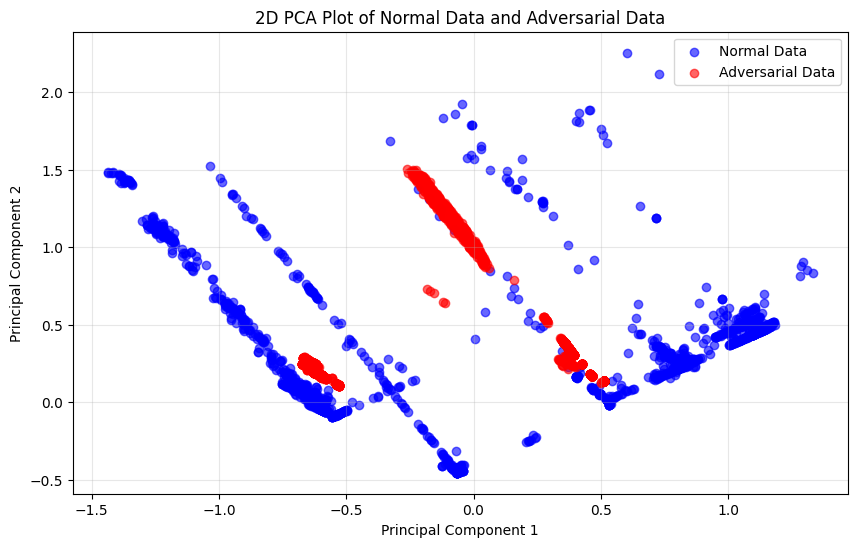

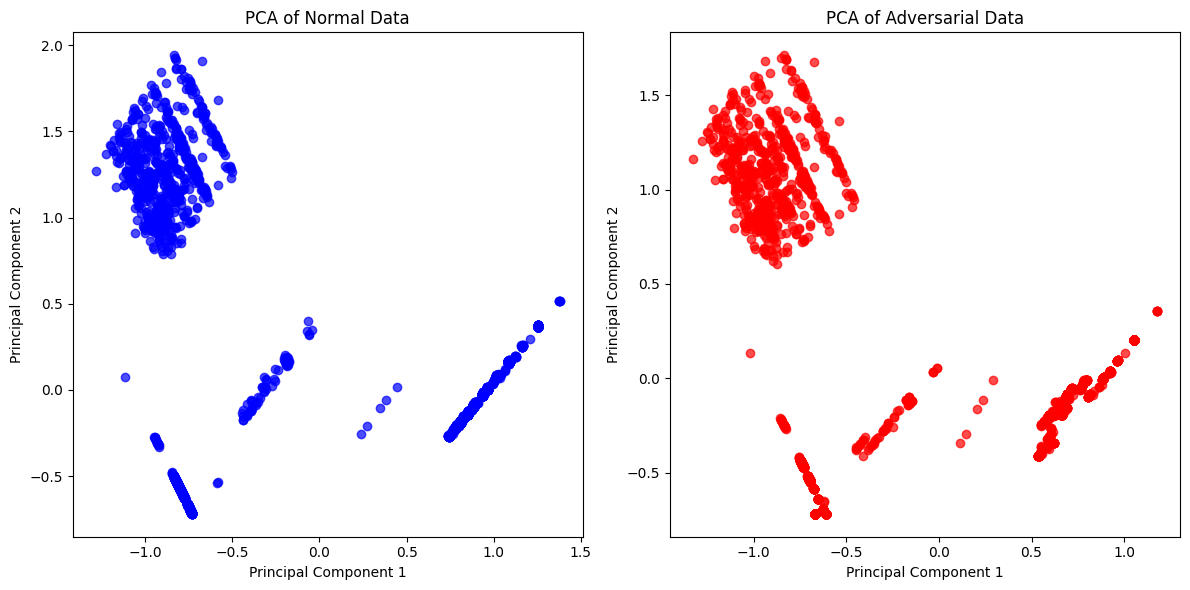

In [8]:
import functions.visualizer as visualizer
import importlib
importlib.reload(visualizer)

visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')
visualizer.pca_visualization_side_by_side(X_train.loc[misclassified_as_benign_due_attack_indices], 'Normal Data', X_adv.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Data')

## Explainer

In [9]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values, shap_values_df = exp.generate_shap_values(explainer, X_train)
print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

shap_values_adv, shap_values_adv_df = exp.generate_shap_values(explainer, X_adv)
print(f"Generate Adversarial Explanations | Indices: {shap_values_adv_df.index[:5]}... | Shape: {shap_values_adv_df.shape}")

PermutationExplainer explainer: 8001it [04:05, 31.62it/s]                          


Generate Explanations | Indices: Index([383258, 1283627, 1595713, 323550, 474229], dtype='int64')... | Shape: (8000, 70)


PermutationExplainer explainer: 8001it [03:54, 32.83it/s]                          


Generate Adversarial Explanations | Indices: Index([383258, 1283627, 1595713, 323550, 474229], dtype='int64')... | Shape: (8000, 70)


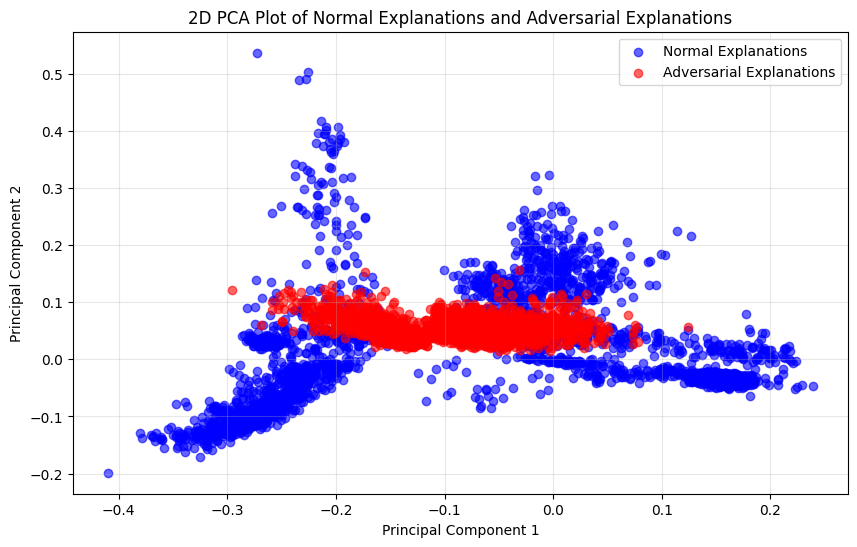

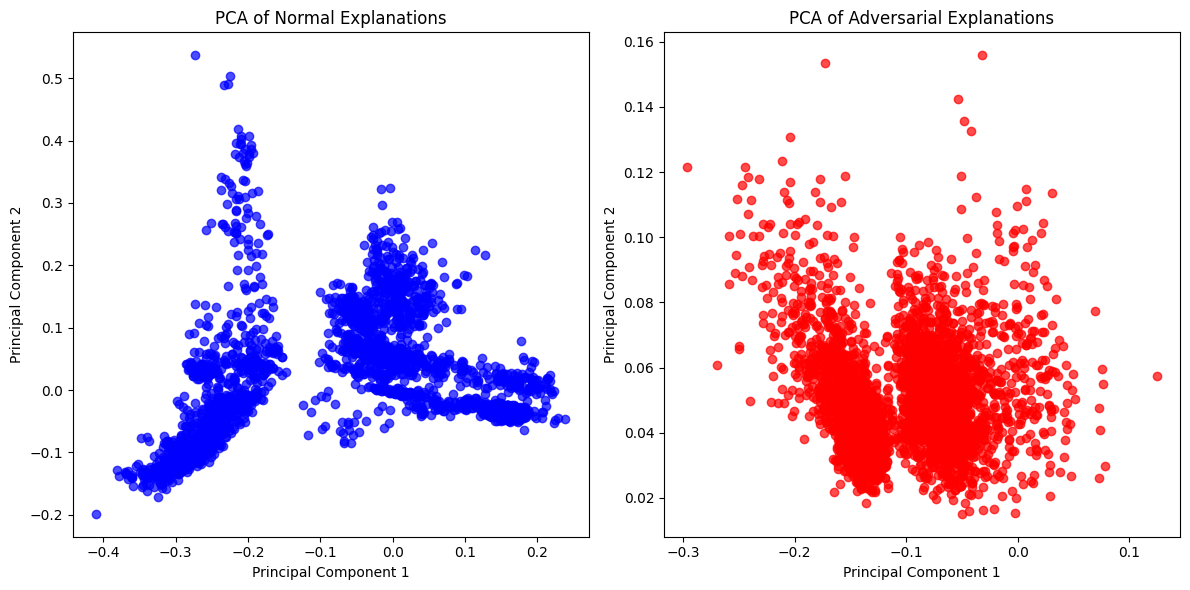

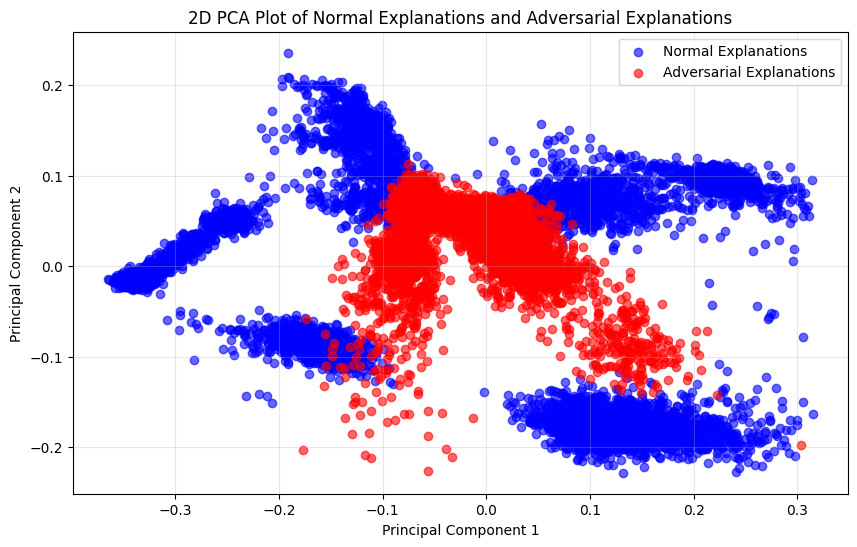

In [10]:
visualizer.visualize_data_distribution(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.pca_visualization_side_by_side(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices], 'Adversarial Explanations')
visualizer.visualize_data_distribution(shap_values_df, 'Normal Explanations', shap_values_adv_df, 'Adversarial Explanations')

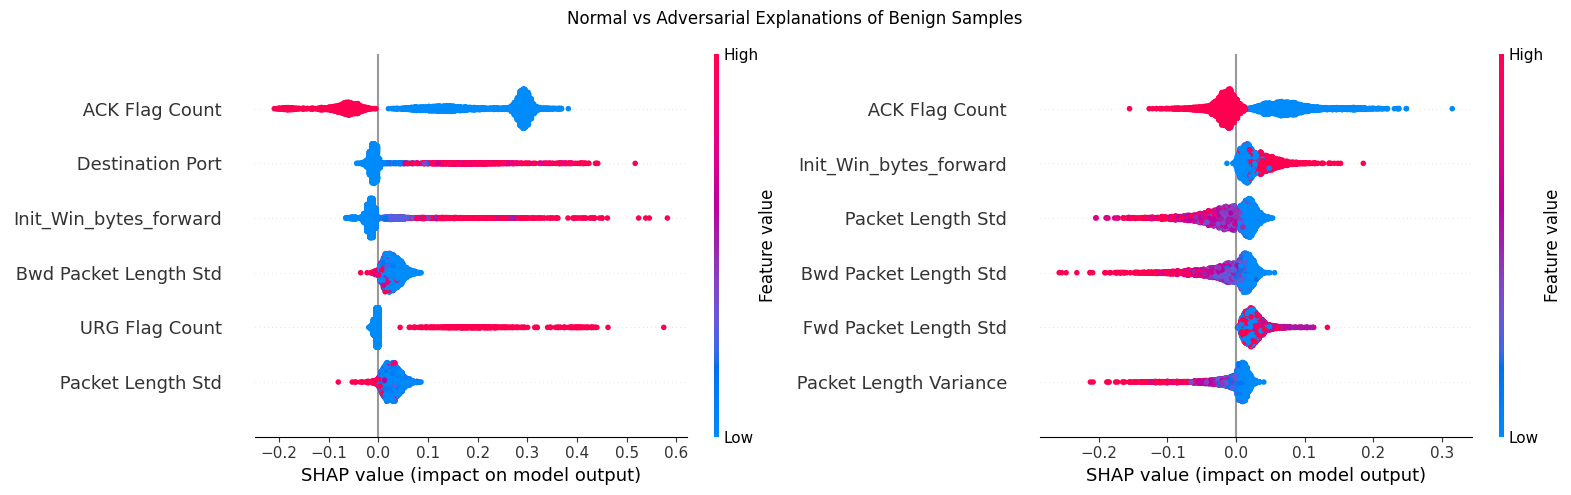

In [11]:
exp.plot_shap_summary_comparison(shap_values_df.loc[correctly_benign_classified_indices].values, X_train.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices].values, X_adv.loc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

## Detector

In [20]:
import functions.detector as det
import importlib
importlib.reload(det)

# build detector to detect adversarial samples that misclassify attack samples as benign

# create dataframe
X, y = det.build_train_datasets(shap_values_df.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices])
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

(7921, 70) (7921, 2)
(7128, 70) (793, 70) (7128, 2) (793, 2)
Epoch 1/10


2025-03-21 10:17:26.240692: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6784 - loss: 0.6745 - val_accuracy: 0.9488 - val_loss: 0.5480
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9198 - loss: 0.4797 - val_accuracy: 0.9965 - val_loss: 0.2223
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.1975 - val_accuracy: 0.9965 - val_loss: 0.0566
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9898 - loss: 0.0733 - val_accuracy: 0.9965 - val_loss: 0.0239
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9961 - loss: 0.0367 - val_accuracy: 0.9972 - val_loss: 0.0139
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9953 - loss: 0.0240 - val_accuracy: 0.9979 - val_loss: 0.0102
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9970 - loss: 0.0188 - val_accuracy: 0.9993 - val_loss: 0.0060
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0132 - val_accuracy: 0.9993 - val_loss: 0.0055
Epo

---
## Manual Evaluation
We perform the whole two-stages approach on new unseen data and evaluate the following scores:
- Recall
- Precision
- Accuracy
- F1 Score

In [13]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=400, random_sample_state=17)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Sampling balanced data ---
Sample to shape: (800, 79)
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 70)
Generate Labels | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 2)
BENIGN  ATTACK
False   True      400
True    False     400
Name: count, dtype: int64


In [19]:
importlib.reload(ag)

X_adv_eval = ag.generate_fgsm_attacks(art_model, X_eval, target_label=1)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Adversarial FGSM examples generated. Shape: (800, 70)
Create Adversarial Attack | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 70)
Accuracy: 50.00%
              precision    recall  f1-score   support

      BENIGN       0.00      0.00      0.00       400
      ATTACK       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 400, FN: 0, TP: 400
Predictions on Adversarial Attacks | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 2)


/home/felix/Documents/Uni/xai-assisted-intrusion-detection-system/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felix/Documents/Uni/xai-assisted-intrusion-detection-system/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/felix/Documents/Uni/xai-assisted-intrusion-detection-system/.env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

In [15]:
importlib.reload(exp)
X_eval_adv_shap_values, X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 801it [00:23, 19.45it/s]                         

Create Explanations | Indices: Index([2056787, 2391506, 802264, 1981689, 480604], dtype='int64')... | Shape: (800, 70)


In [16]:
benign_eval_idx = y_eval[y_eval['BENIGN'] == 1].index
attack_eval_idx = y_eval[y_eval['ATTACK'] == 1].index

pred_benign_idx = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
pred_attack_idx = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

# predict
X_eval_detector = X_eval_adv_shap_values_df.loc[pred_benign_idx]

y_pred_eval_detector = det.predict(detector, X_eval_detector, y_eval.columns)
correctly_classified_det_idx = y_pred_eval_detector[y_pred_eval_detector['BENIGN'] == 1].index
misclassified_det_idx = y_pred_eval_detector[y_pred_eval_detector['ATTACK'] == 1].index
print(f"Correctly classified as BENIGN: {len(correctly_classified_det_idx)} | Indices: {correctly_classified_det_idx[:3]}")
print(f"Misclassified as ATTACK: {len(misclassified_det_idx)} | Indices: {misclassified_det_idx[:3]}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
Correctly classified as BENIGN: 32 | Indices: Index([2332973, 2264137, 1968135], dtype='int64')
Misclassified as ATTACK: 768 | Indices: Index([2056787, 2391506, 802264], dtype='int64')


In [17]:
# After IDS Stage
TN = len(attack_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'ATTACK' samples as 'ATTACK'
print(f"IDS classifies 'ATTACK' samples as 'ATTACK': {TN}")
FN = len(benign_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'BENIGN' samples as 'ATTACK'
print(f"IDS mis-classifies 'BENIGN' samples as 'ATTACK': {FN}")

# After Detector Stage
TP = len(benign_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Detector classifies 'BENIGN' samples as correct 'BENIGN': {TP}")
FP = len(attack_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': {FP}")

TN_2 = len(attack_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': {TN_2}")
FN_2 = len(benign_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': {FN_2}")

# Sum up TN & FN from both stages
TN = TN + TN_2
FN = FN + FN_2

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
print(f"Sum: {TP + FP + TN + FN}")

IDS classifies 'ATTACK' samples as 'ATTACK': 0
IDS mis-classifies 'BENIGN' samples as 'ATTACK': 0
Detector classifies 'BENIGN' samples as correct 'BENIGN': 32
Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': 0
Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': 400
Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': 368
TP: 32
FP: 0
TN: 400
FN: 368
Sum: 800


In [18]:
from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['BENIGN', 'ATTACK'])
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

Global Accuracy: 54.00%
              precision    recall  f1-score   support

      BENIGN       0.52      1.00      0.68       400
      ATTACK       1.00      0.08      0.15       400

    accuracy                           0.54       800
   macro avg       0.76      0.54      0.42       800
weighted avg       0.76      0.54      0.42       800

True Negative Rate: 100.00%
False Positive Rate: 0.00%
True Positive Rate: 8.00%
False Negative Rate: 92.00%
